In [12]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
best_sub_list =  sorted(glob('../../../data/kaggle/LAMA/sub/*'))
best_sub_list

['../../../data/kaggle/LAMA/sub/diff_m_16_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/mean_sub.csv',
 '../../../data/kaggle/LAMA/sub/median_sub.csv',
 '../../../data/kaggle/LAMA/sub/perc_0.6_sub.csv',
 '../../../data/kaggle/LAMA/sub/up_0_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_10_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_11_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_12_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_13_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_14_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_15_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_1_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_2_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_3_lightautoml_submission.csv',
 '../../../data/kaggle/LAMA/sub/up_4_lightautoml_submission (1).csv',
 '../../../data/kaggle/LAMA/sub/up_4_lightauto

In [134]:
best_sub_list = ['../../../data/kaggle/LAMA/sub/up_13_lightautoml_submission.csv', 
                 '../../../data/kaggle/LAMA/sub/up_14_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_6_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_4_lightautoml_submission (1).csv',
                 '../../../data/kaggle/LAMA/sub/up_5_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_7_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_10_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_8_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_9_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_12_lightautoml_submission.csv',
                 '../../../data/kaggle/LAMA/sub/up_11_lightautoml_submission.csv',
                '../../../data/kaggle/LAMA/sub/up_15_lightautoml_submission.csv',
                '../../../data/kaggle/LAMA/sub/diff_m_16_lightautoml_submission.csv']

In [138]:
sub = {}
for i, p in enumerate(best_sub_list):
    sub[i] = pd.read_csv(p)
    

/home/mrmopoz/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


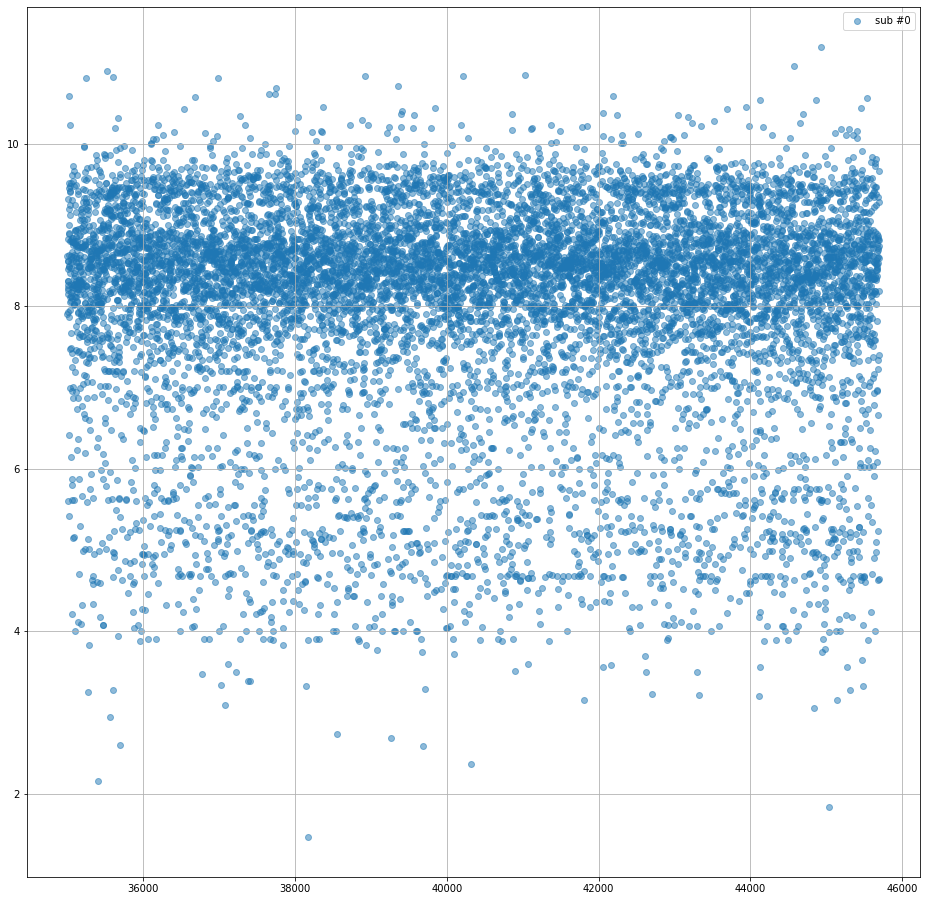

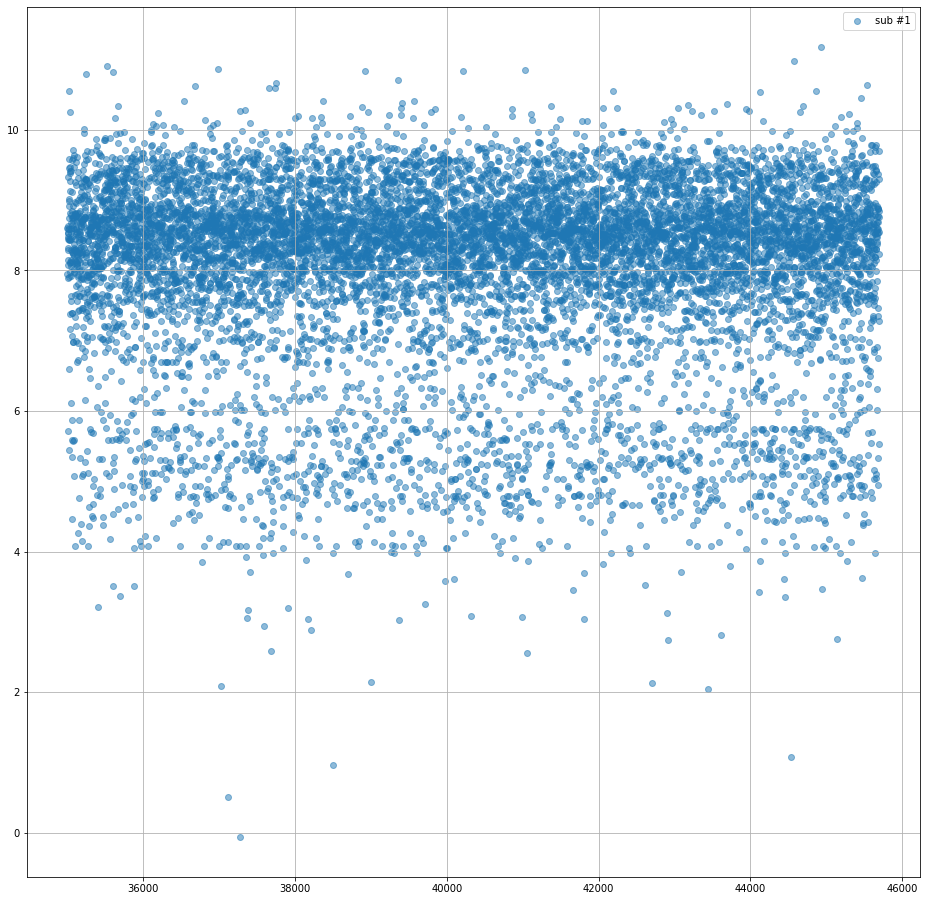

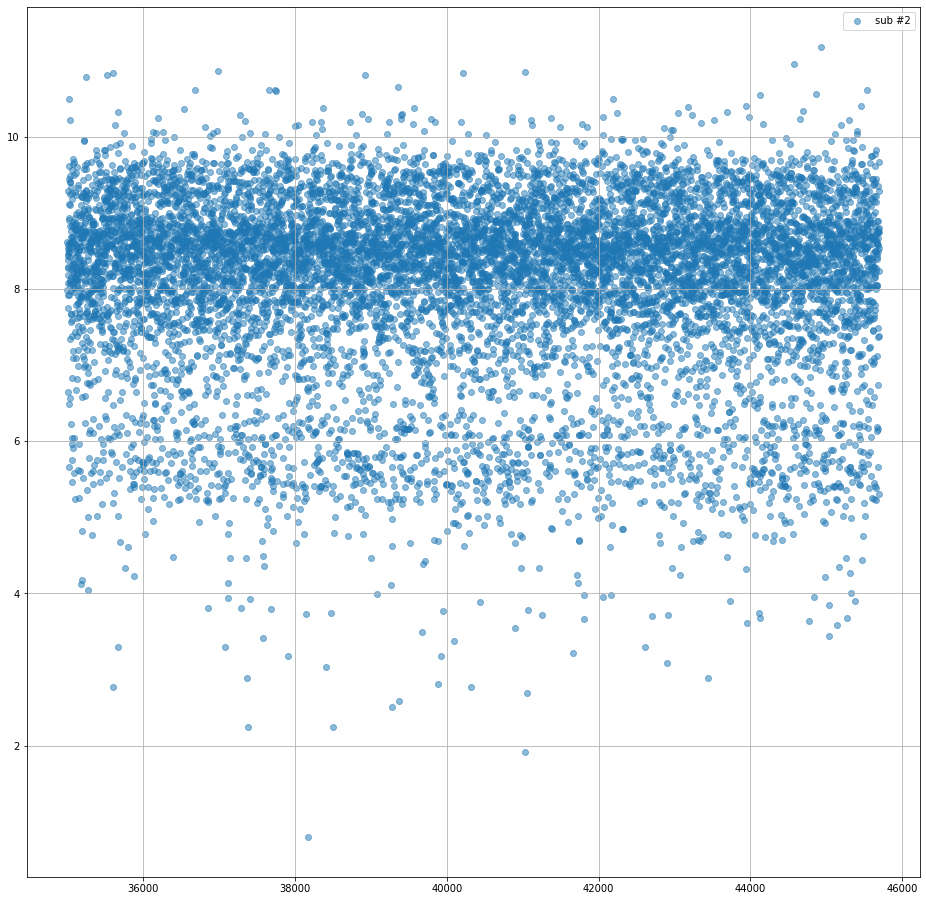

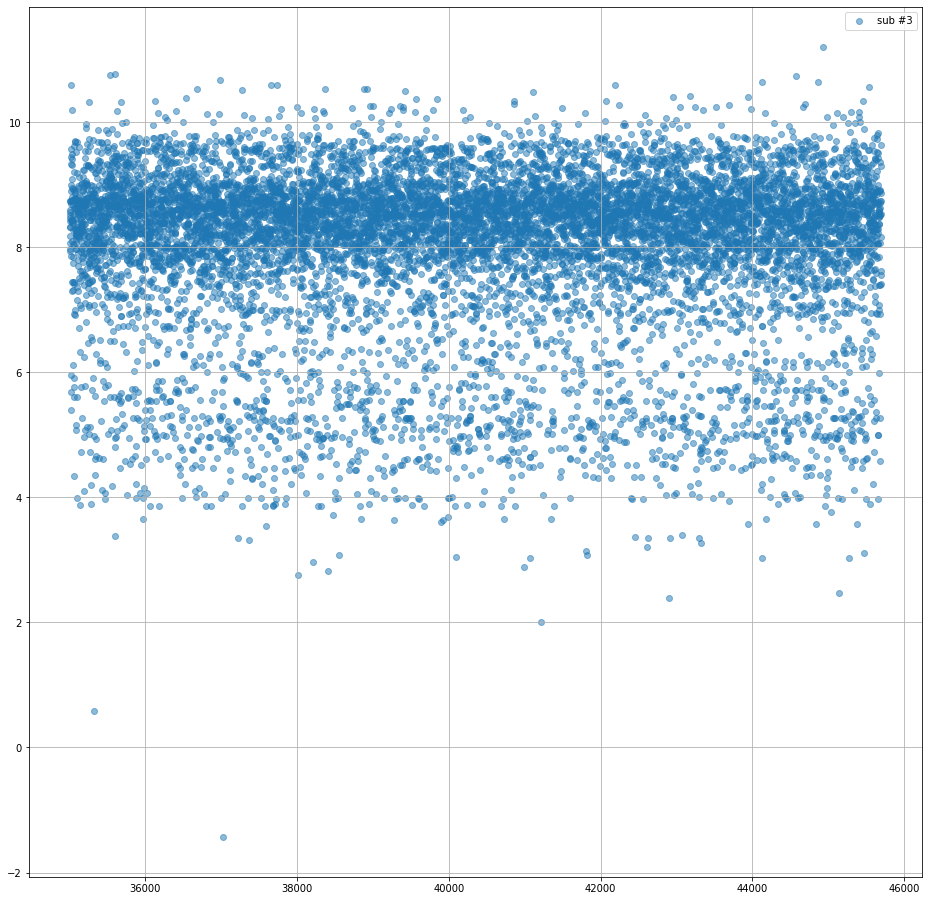

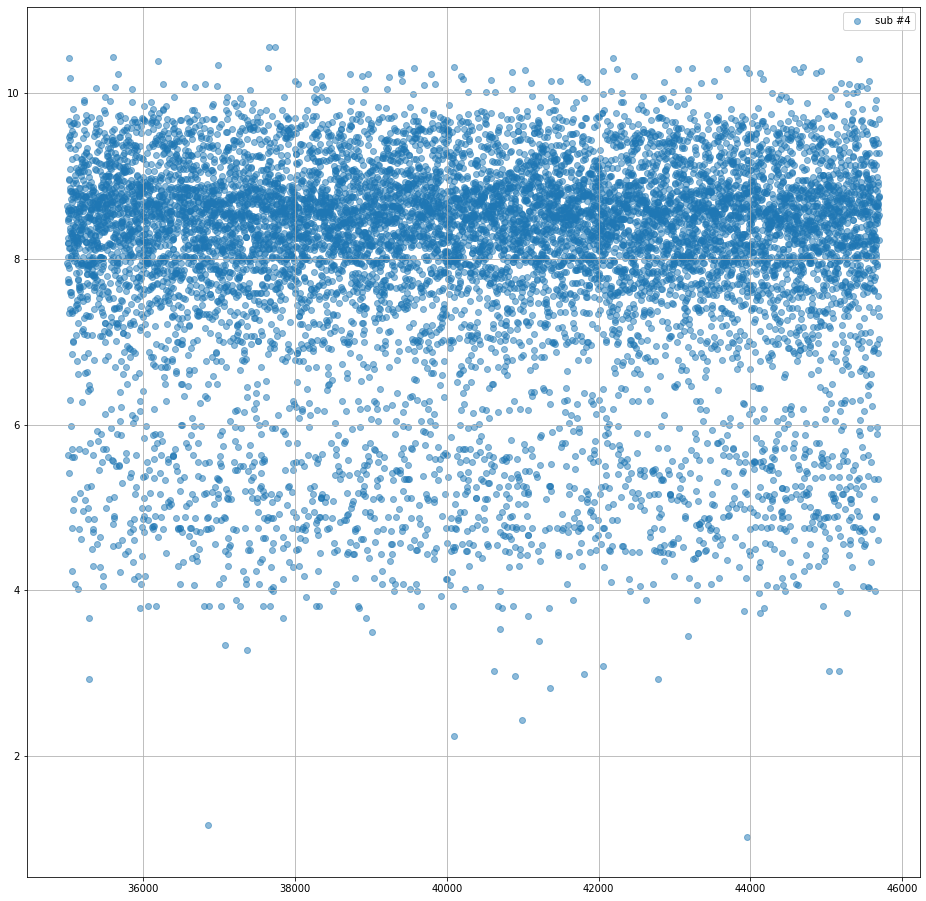

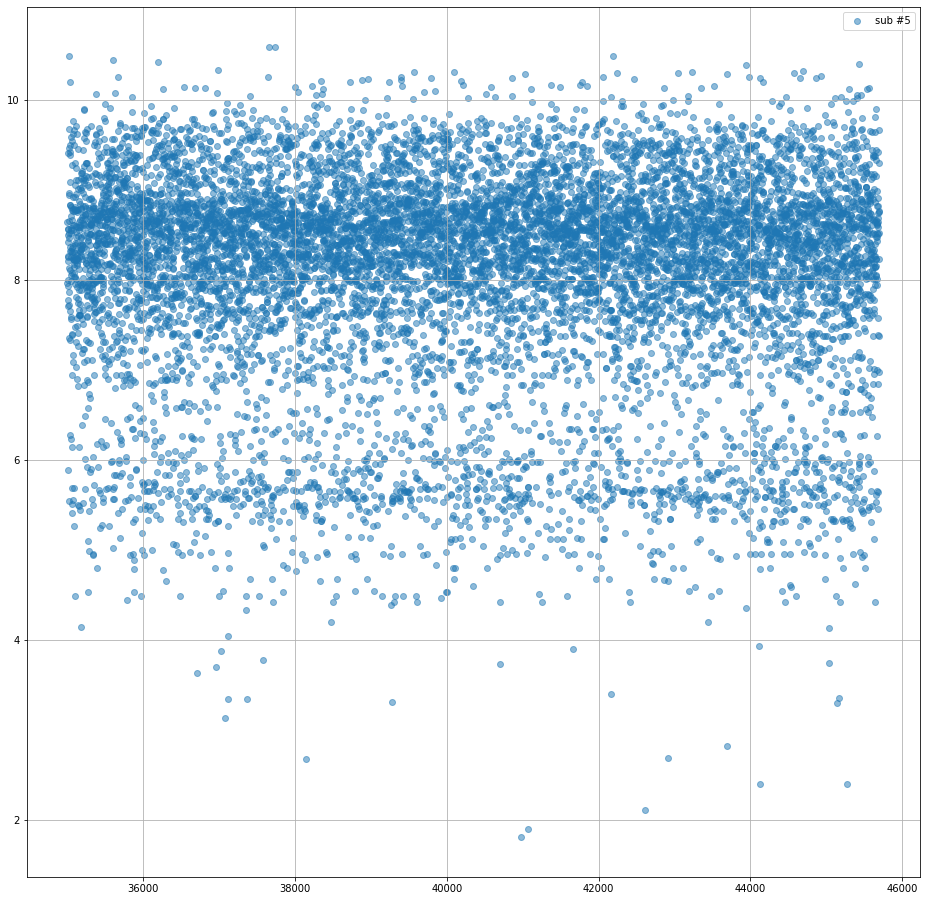

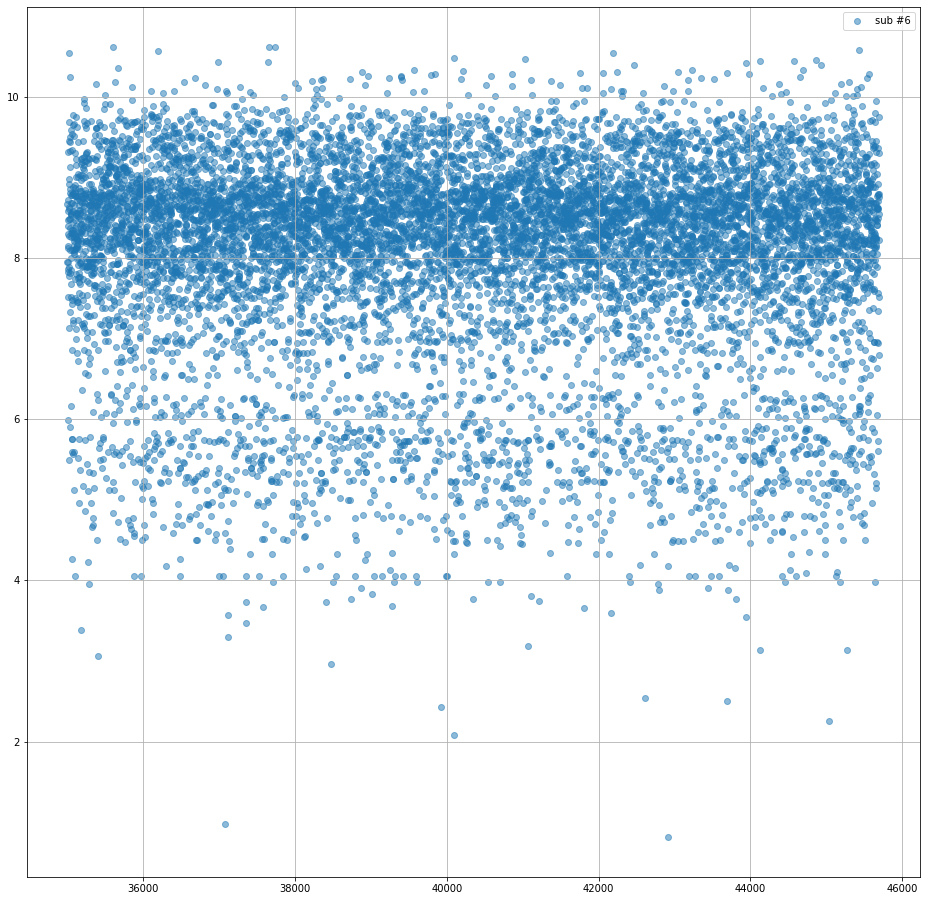

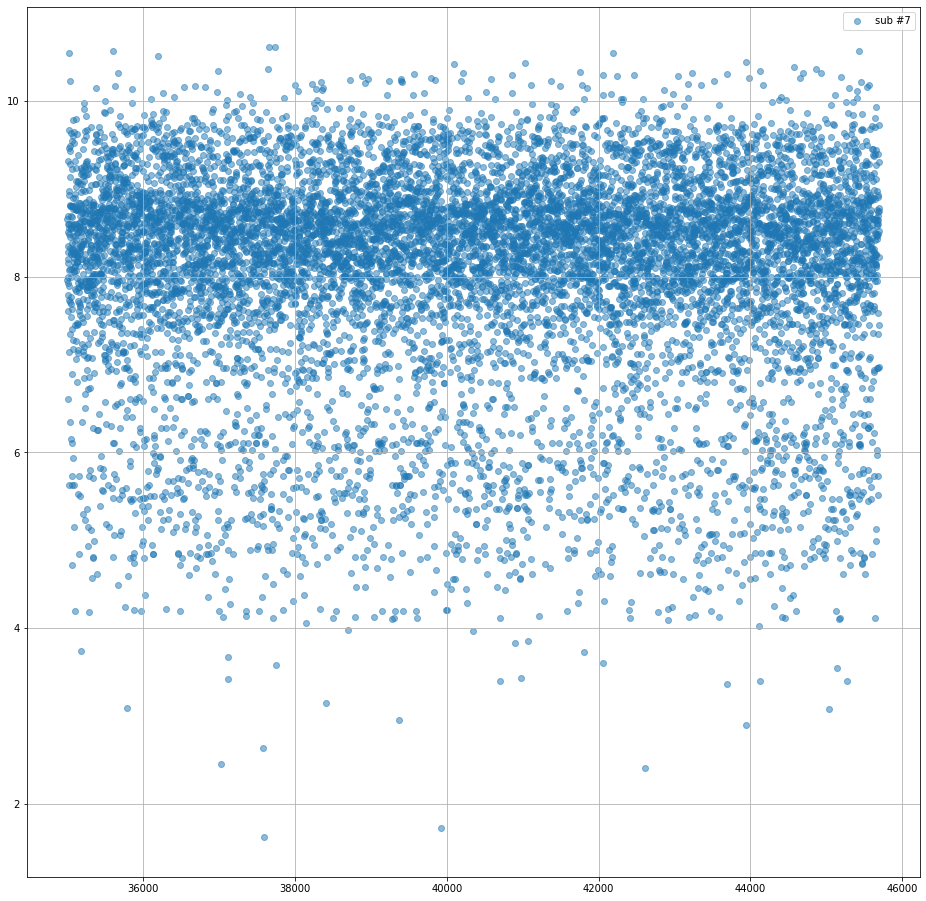

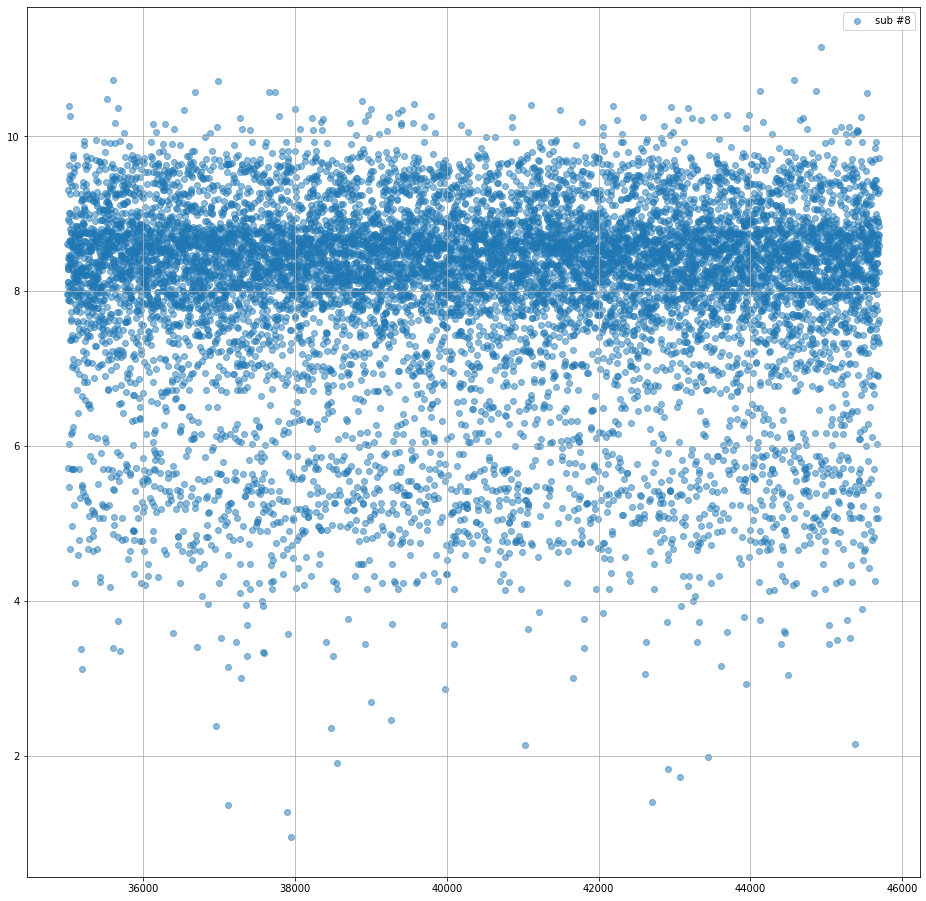

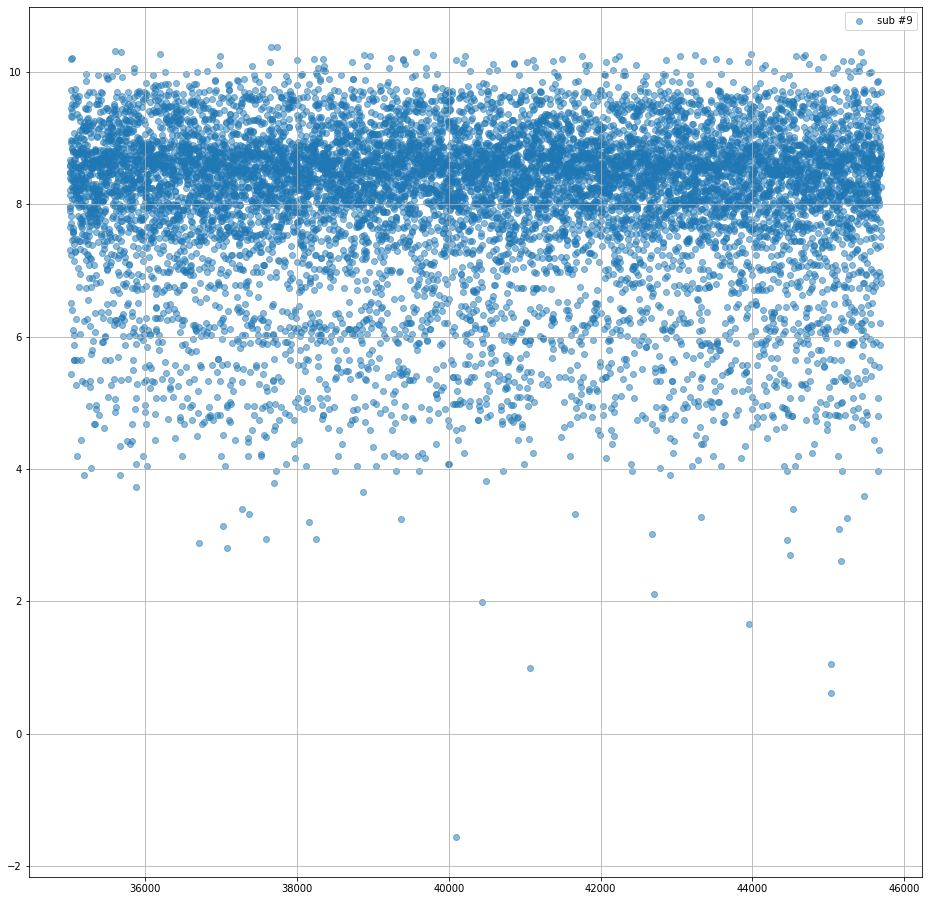

In [78]:

for k in sub.keys():
    plt.figure(figsize=(16,16))
    plt.scatter(sub[k]['row_ID'], np.log1p(sub[k]['final_price']), label=f'sub #{k}', alpha=0.5)

    plt.legend()
    plt.grid()
    plt.show()

In [139]:
pd.concat(sub.values()).groupby('row_ID').mean().to_csv('../../../data/kaggle/LAMA/sub/mean_sub.csv')
pd.concat(sub.values()).groupby('row_ID').median().to_csv('../../../data/kaggle/LAMA/sub/median_sub.csv')

In [48]:
def perc(a, q=0.8):
    return np.percentile(a, q)
pd.concat(sub.values()).groupby('row_ID').agg({'final_price': perc}).to_csv('../../../data/kaggle/LAMA/sub/perc_0.6_sub.csv')

In [128]:
sum_weigths = 0
for k in sub.keys():
    sub[k]['final_price'] = sub[k]['final_price'] * ((k+1) * 0.01515)
    
pd.concat(sub.values()).groupby('row_ID').sum().to_csv('../../../data/kaggle/LAMA/sub/weighted_sum_sub.csv')

In [119]:
sub.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])